In [1]:
import numpy as np
import pandas as pd
import math
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
import explore

In [2]:
df = pd.read_csv('anonymized-curriculum-access.txt',header=None, sep = " ")

In [ ]:
df.info()

In [ ]:
df.head(50)

In [ ]:
df[4].value_counts().sort_index()

In [ ]:
df[3].value_counts().sort_index()

In [3]:
df.rename(columns = {0: 'date', 1:'time', 2: 'page', 3: 'x', 4:'y', 5:'ip_address'},inplace = True)

In [ ]:
df

In [ ]:
df.page.value_counts()

In [ ]:
df.ip_address.value_counts()

In [4]:
df['datetime'] = df[['date','time']].apply(lambda x: ' '.join(x),axis = 1)

In [5]:
df.datetime = pd.to_datetime(df.datetime)

In [ ]:
df.info()

In [6]:
df.set_index('datetime',inplace = True)

In [ ]:
df

In [7]:
df.drop(columns = ['date','time'], inplace = True)

In [ ]:
df

In [ ]:
start_df = df.loc['2019-02-04']

In [ ]:
start_df

In [ ]:
df[df.x == 1]

In [ ]:
df[df.x == df.x.max()]

In [ ]:
df[df.y == 28].x.value_counts()

In [ ]:
df[df.ip_address == '66.42.139.162']

In [ ]:
january18_df = df['2018-01-01':'2018-01-31']

In [ ]:
january18_df.x.value_counts().sort_index()

In [ ]:
january18_df.x.describe()

In [ ]:
df[df.y == 34]

In [ ]:
df['2019-02-04']

In [ ]:
user1 = df[df.x == 1]

In [ ]:
user1[user1.y == 28]

In [ ]:
df[df.y == 28].x.value_counts()

In [ ]:
df[df.x == 248].ip_address.value_counts()

In [ ]:
df[df.x==404]

In [ ]:
df[df.y == 34]['2019-11-17']

In [ ]:
df[(df.x == 478) & (df.ip_address == '12.197.196.242')]

In [ ]:
ada_cohort = df['2019-02-02':]
ada_cohort[ada_cohort.y.isna()].x.value_counts().sort_index()

In [ ]:
ada_cohort[ada_cohort.x == 406]

In [ ]:
ada_cohort[ada_cohort.x == 403].ip_address.value_counts()

In [ ]:
df[df.ip_address == '70.94.182.14']

In [ ]:
df.ip_address.value_counts()

In [ ]:
df.groupby('y').count()

In [ ]:
df.groupby('y').x.unique()

In [ ]:
df.groupby('y').x.unique()[28]

In [ ]:
df.resample('W').count()

In [ ]:
sorted(df.y.unique())

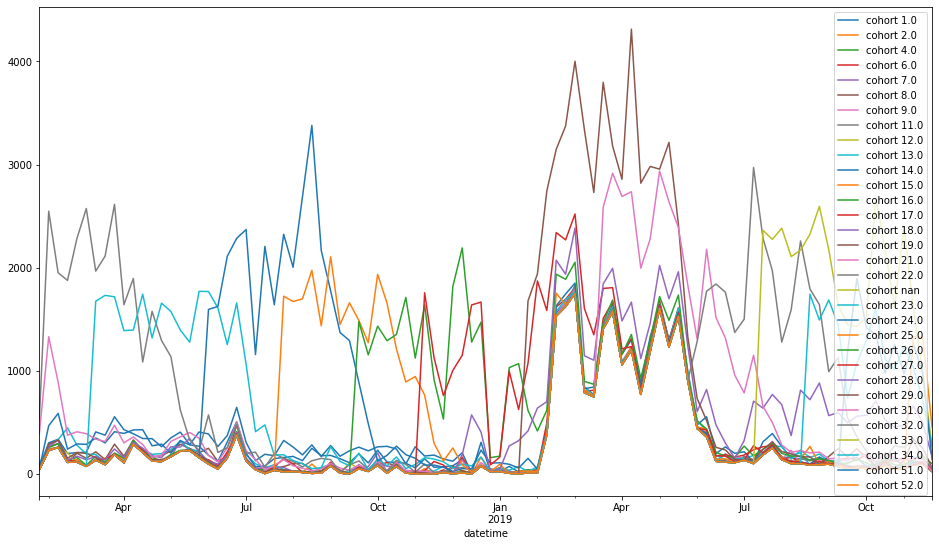

In [34]:
for x in sorted(df.y.unique()):
    df[(df.y== x) | (df.y.isna())].resample('W').count().page.plot(figsize = (16,9), label = 'cohort {}'.format(x))
plt.legend()
plt.show()

In [ ]:
df[df.y==x].resample('W').count()

In [ ]:
df[df.y == 4]

In [ ]:
df[df.y==9]

In [ ]:
df[df.y==2.0]

In [ ]:
(df[df.y==6])[df[df.y==6].x ==283].resample('D').count().page.plot()

In [ ]:
df.groupby('x').count()

In [ ]:
df.fillna(-1).groupby('y').x.unique().index

In [ ]:
count_of_class = []
for i in df.groupby('y').x.unique().index :
    count_of_class.append(len(df.groupby('y').x.unique()[i]))
count_of_class

In [ ]:
pd.DataFrame({'cohort': df.groupby('y').x.unique().index, 'people_cnt': count_of_class})

In [ ]:
df[df.y == 13]

In [ ]:
df[df.y == 13].groupby('x').count()

In [ ]:
df[df.x == 68].resample('D').count().page.plot(figsize = (16,4))

In [ ]:
df[df.x == 478].resample('D').count().page.plot(figsize = (16,4))

In [61]:
df.groupby('y').x.unique()

y
1.0     [11, 60, 64, 95, 141, 146, 148, 170, 209, 211,...
2.0                                       [144, 280, 396]
4.0                                                  [85]
6.0                                            [283, 405]
7.0                          [77, 169, 173, 88, 348, 513]
8.0                                    [1, 114, 150, 174]
9.0                                                 [152]
11.0                             [177, 245, 88, 279, 463]
12.0                                  [101, 161, 214, 88]
13.0        [50, 51, 66, 68, 93, 113, 156, 167, 118, 318]
14.0         [53, 69, 80, 82, 90, 98, 139, 147, 149, 246]
15.0                             [72, 107, 164, 172, 427]
16.0                [21, 40, 97, 143, 165, 181, 216, 322]
17.0    [102, 106, 140, 151, 168, 210, 241, 242, 281, ...
18.0    [26, 67, 76, 81, 83, 84, 91, 104, 108, 162, 17...
19.0    [37, 70, 71, 75, 87, 92, 94, 96, 105, 109, 112...
21.0    [10, 15, 16, 17, 22, 24, 27, 28, 33, 36, 38, 4...
22.0    [2, 

In [68]:
people = []
for x in df.groupby('y').x.unique().index:
    people.append((len(df.groupby('y').x.unique()[x])))
#people

In [67]:
pd.DataFrame({'cohort': df.groupby('y').x.unique().index, 'people': people})

,cohort,people
0,1.0,18
1,2.0,3
2,4.0,1
3,6.0,2
4,7.0,6
5,8.0,4
6,9.0,1
7,11.0,5
8,12.0,4
9,13.0,10


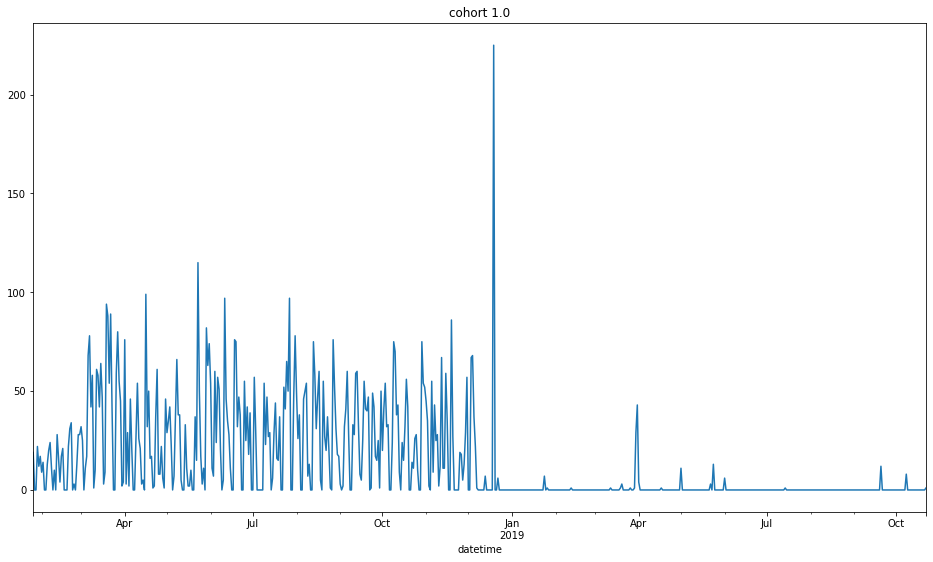

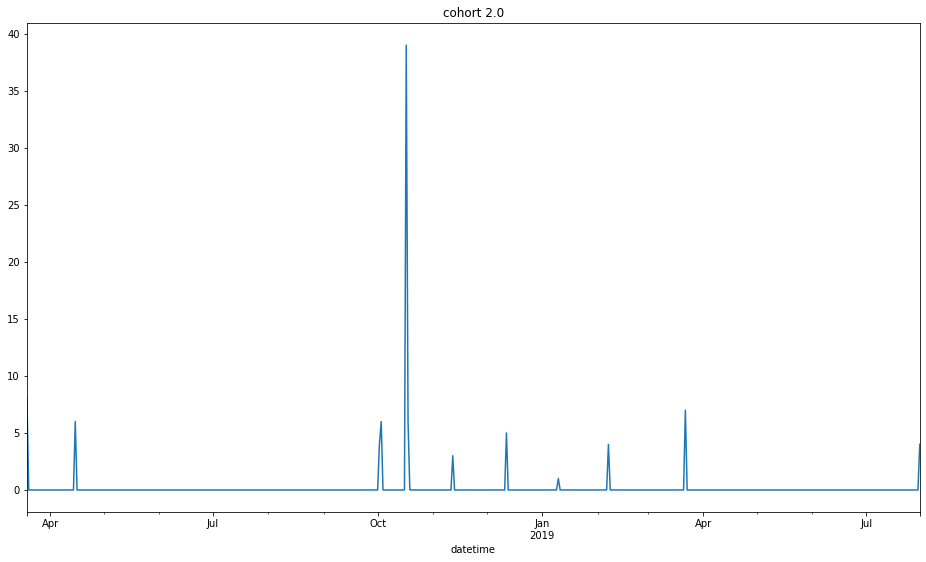

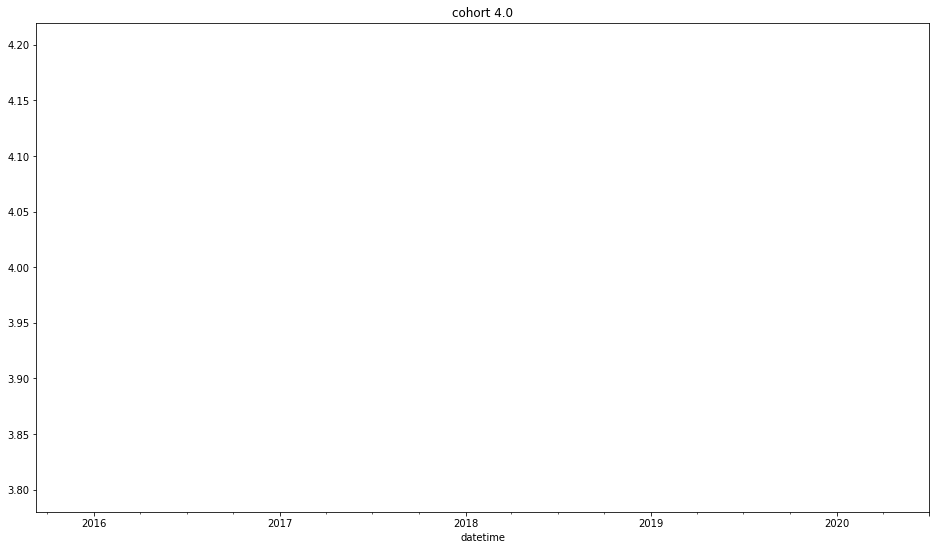

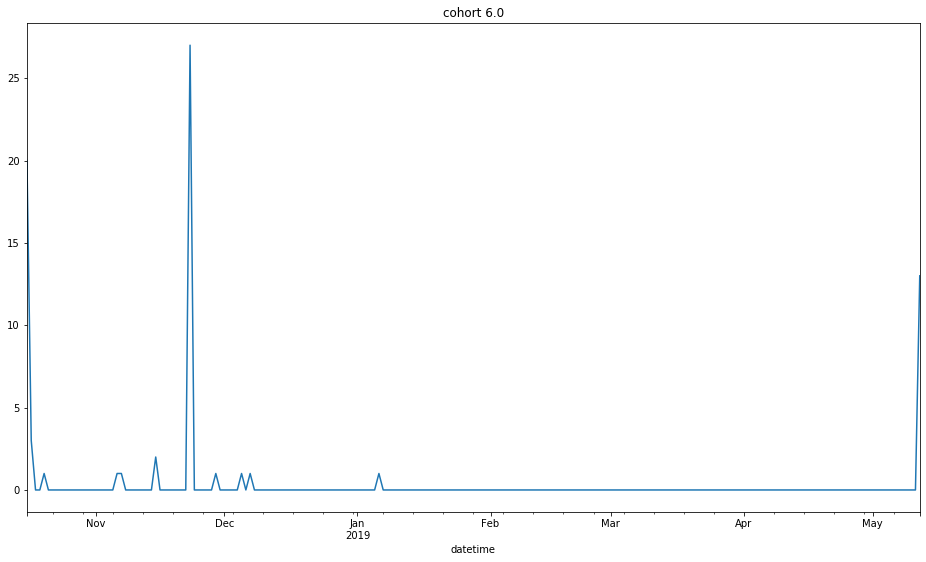

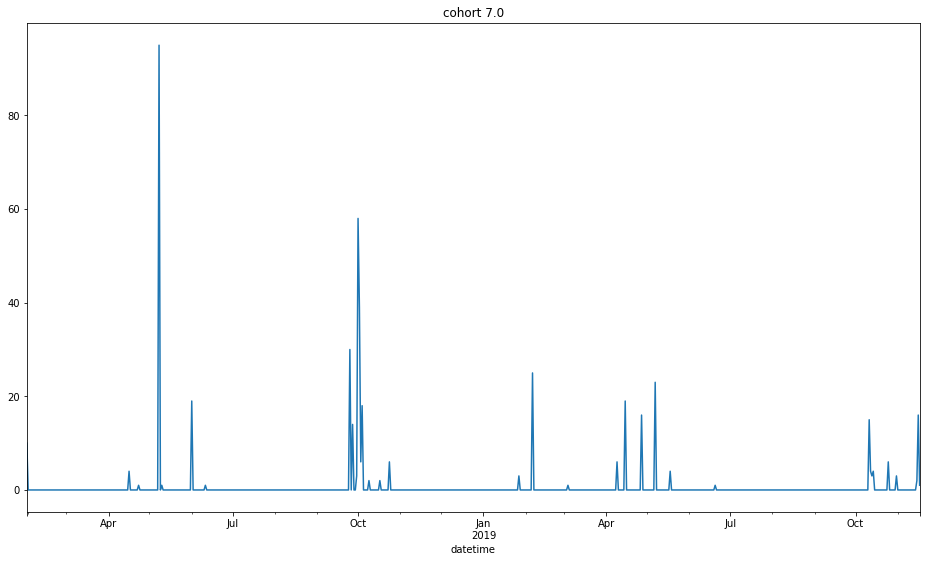

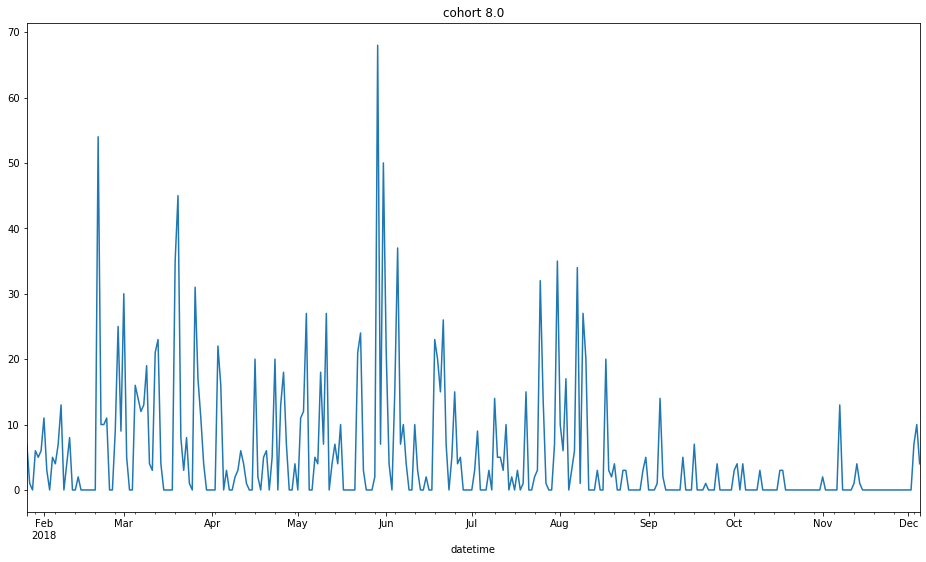

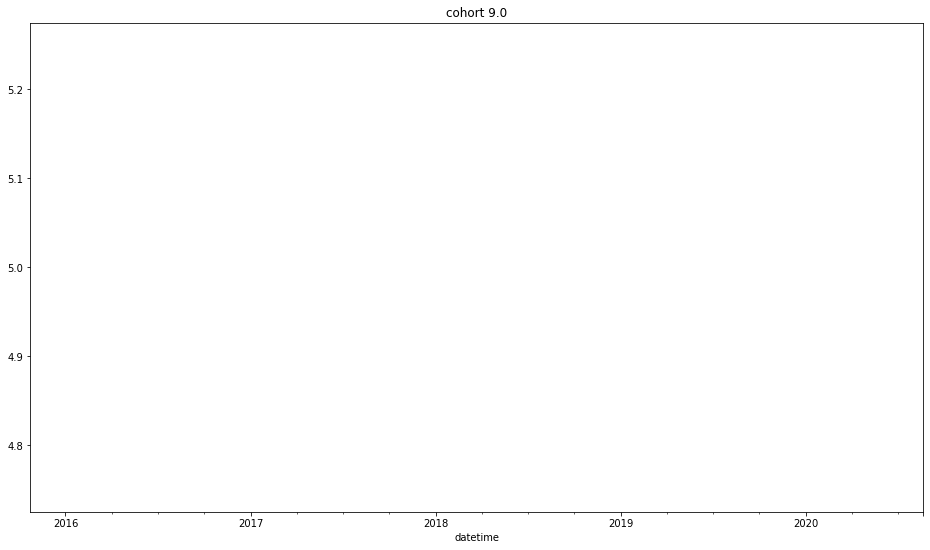

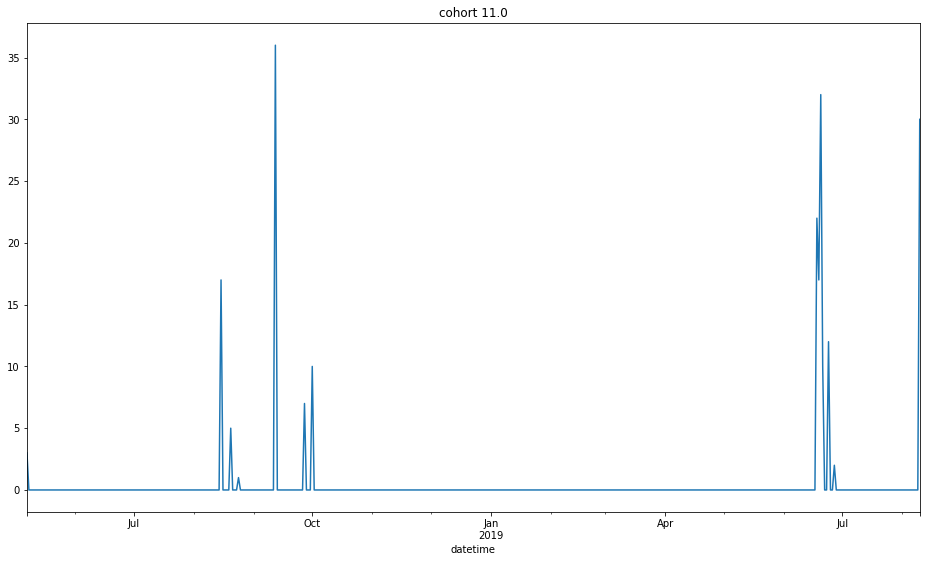

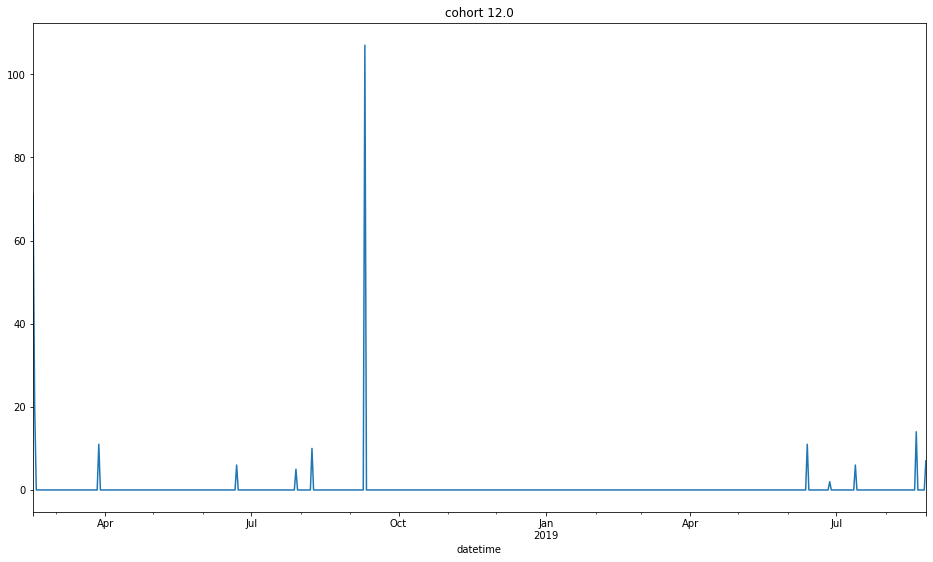

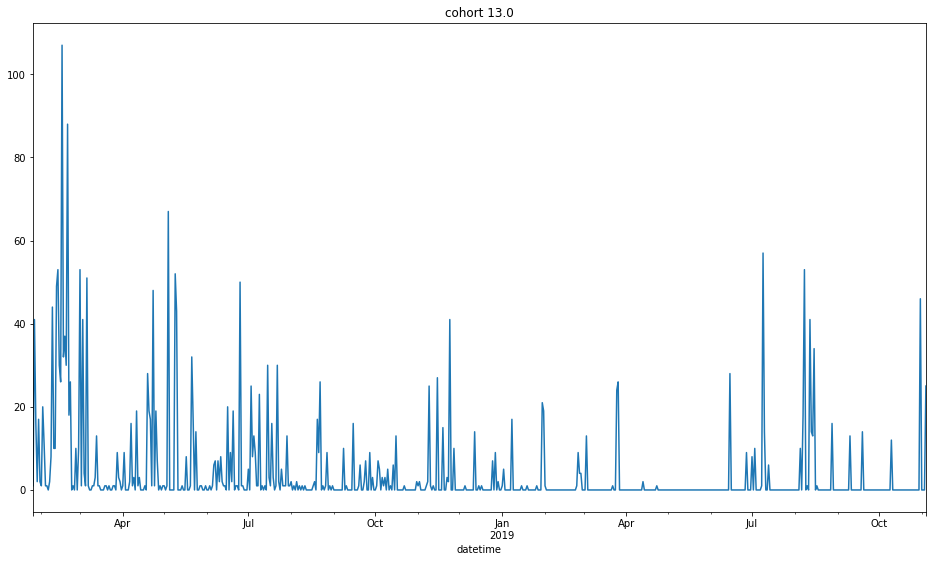

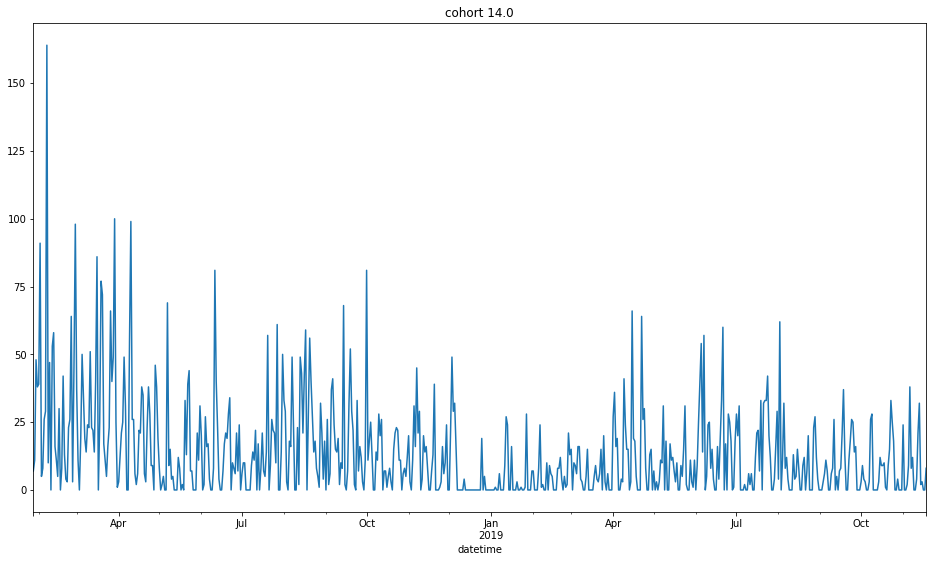

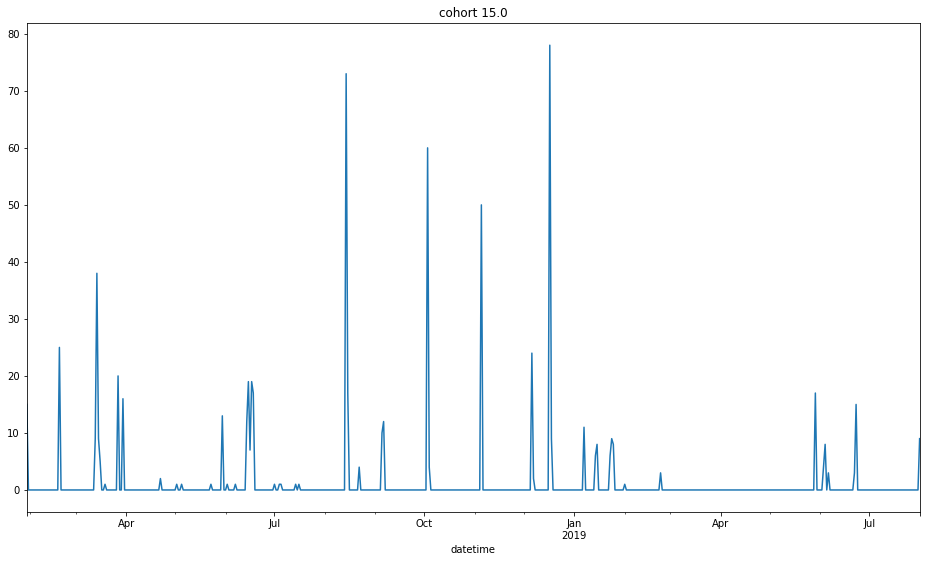

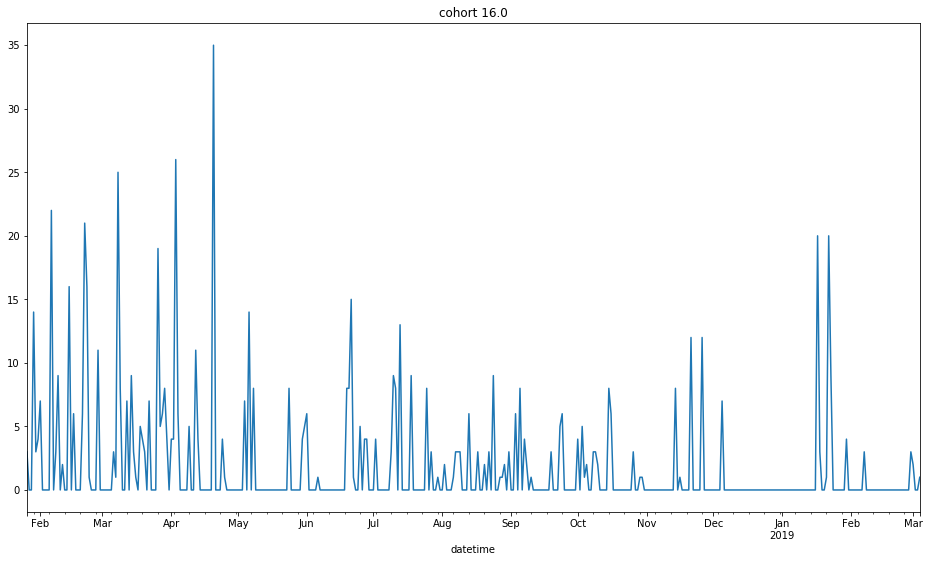

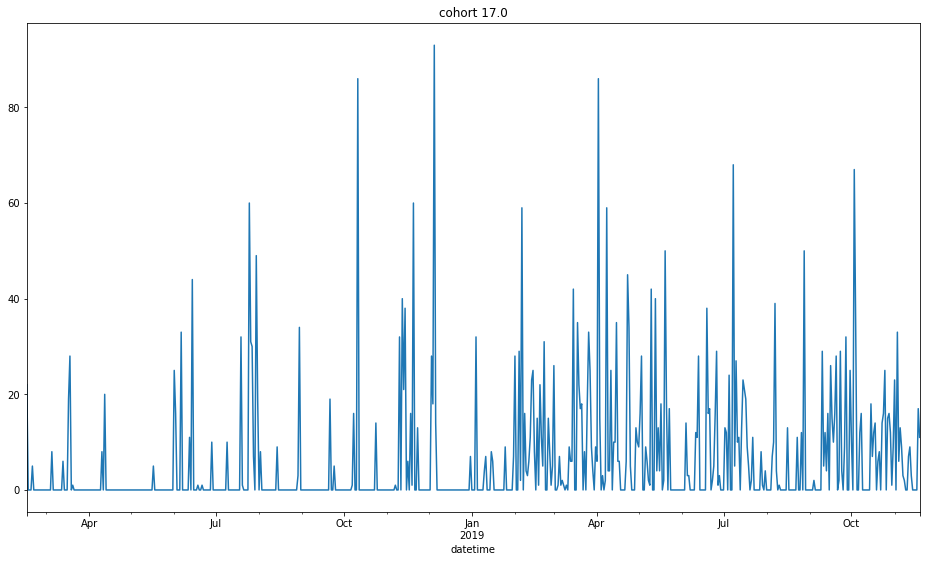

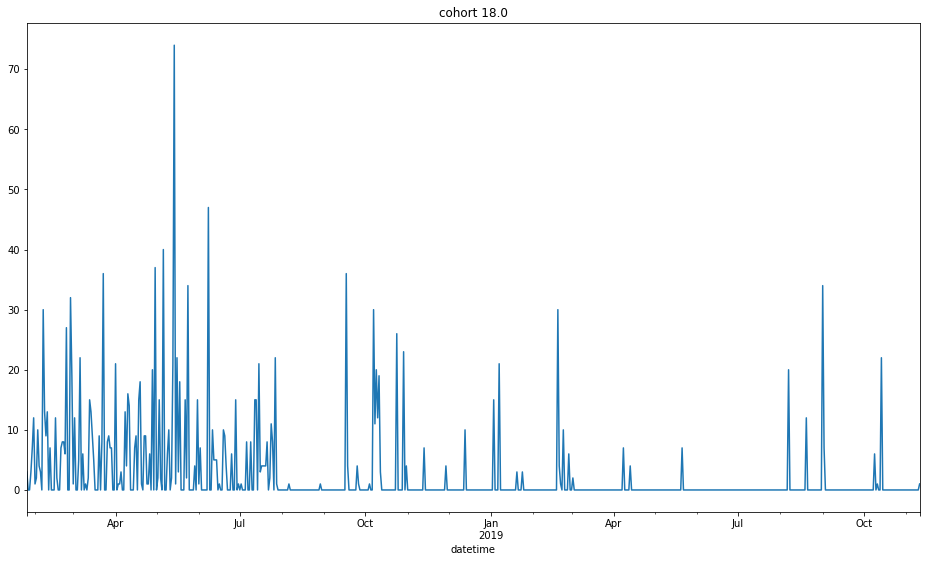

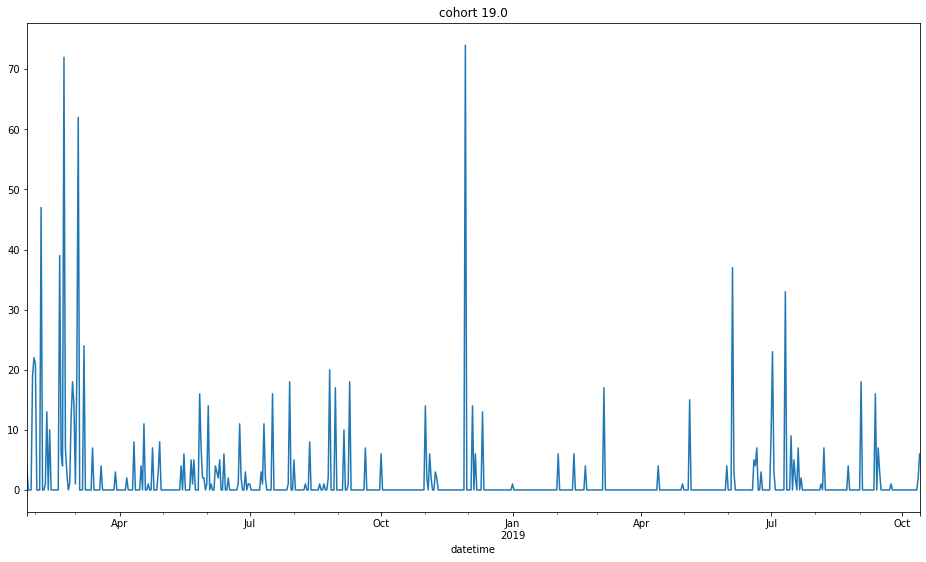

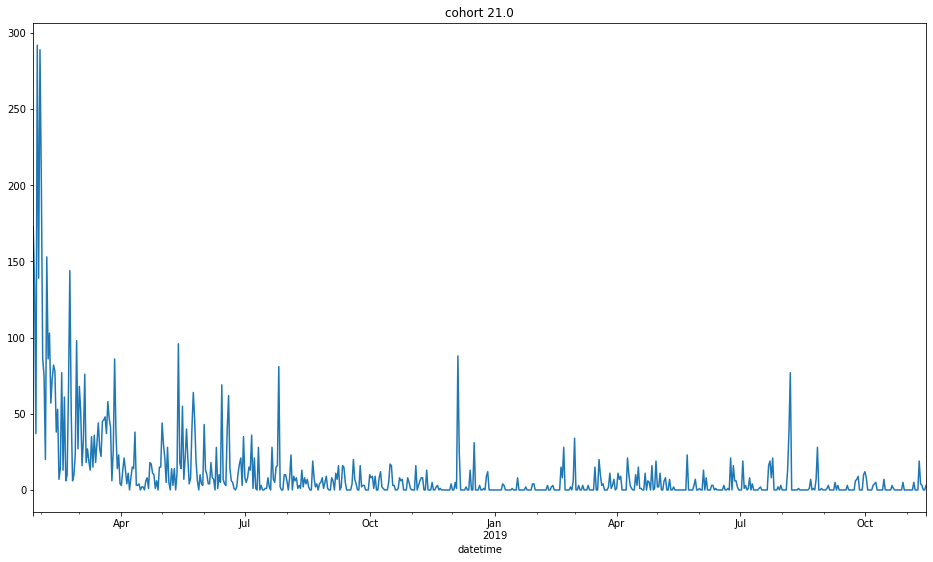

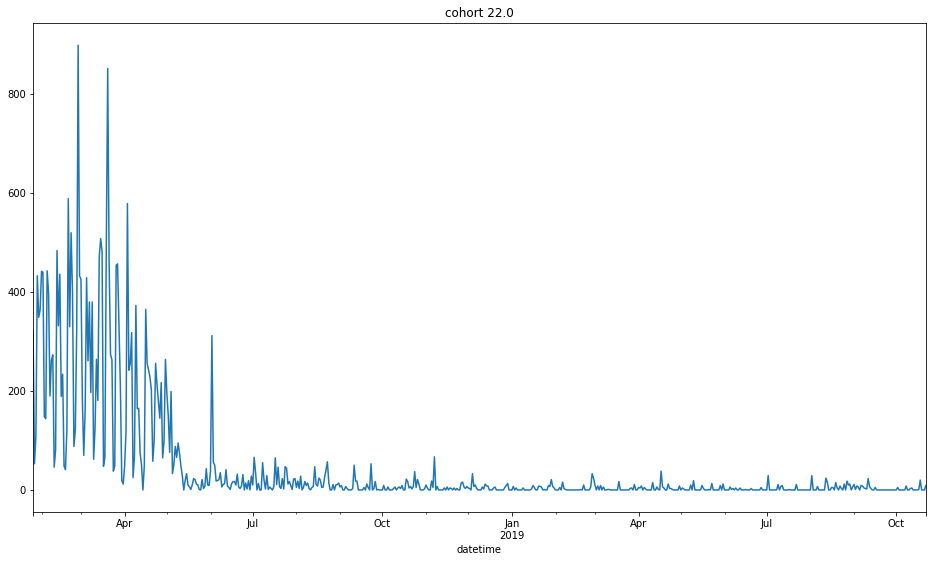

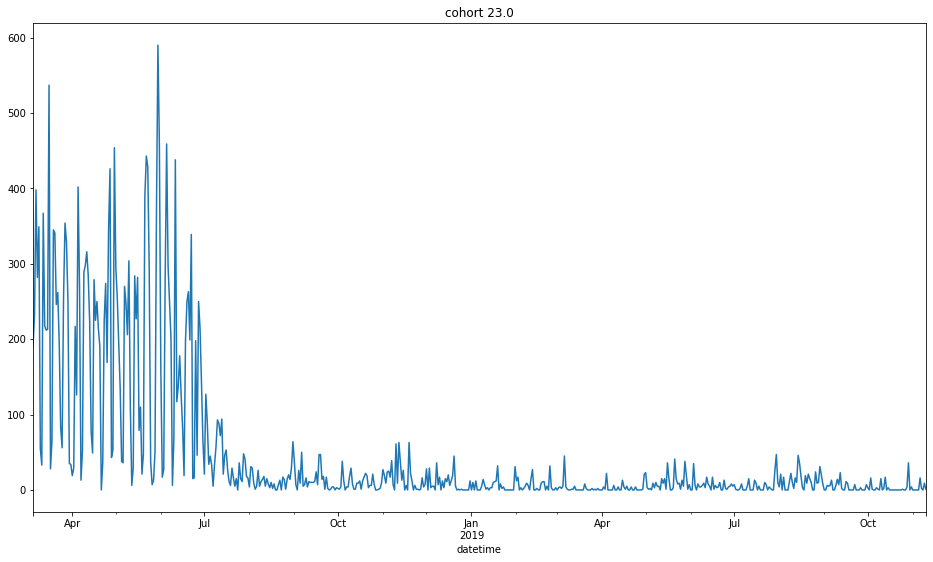

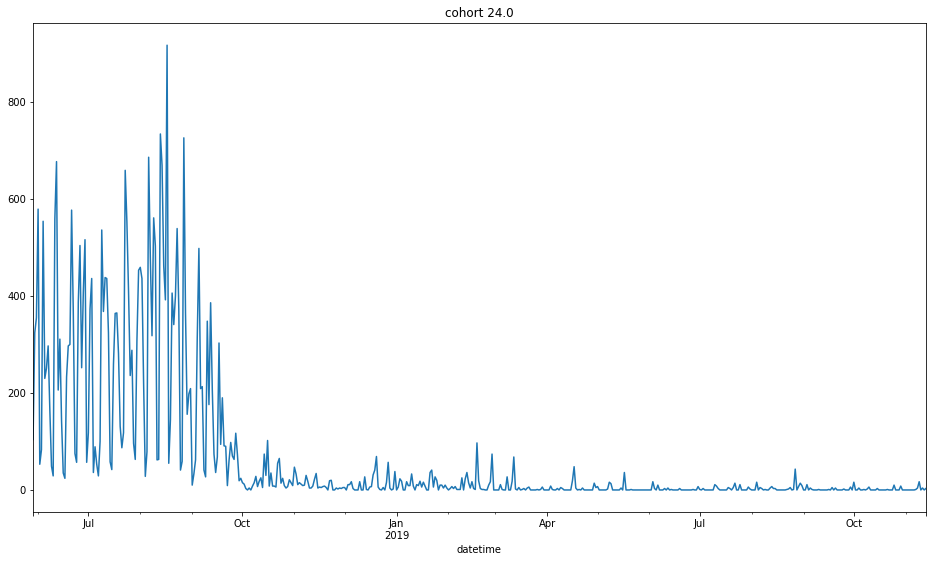

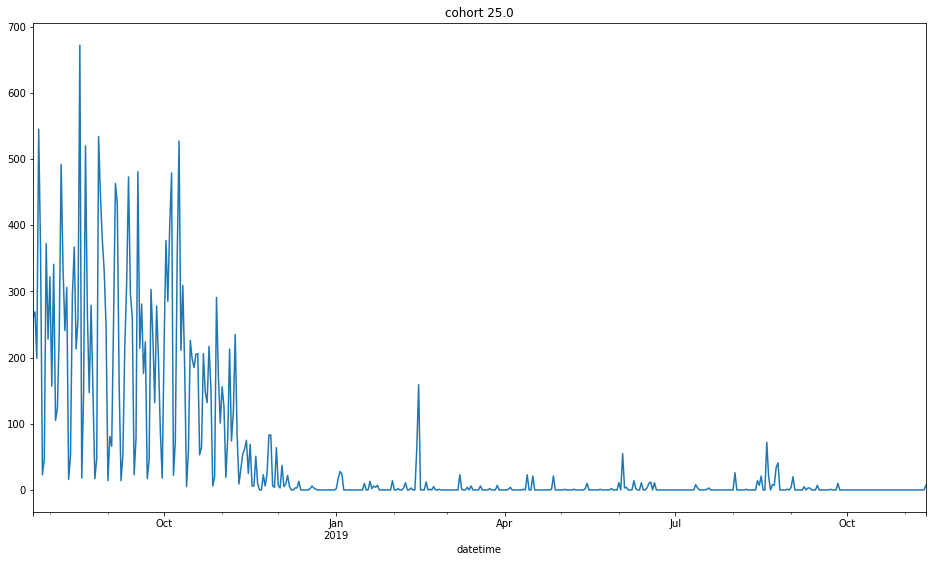

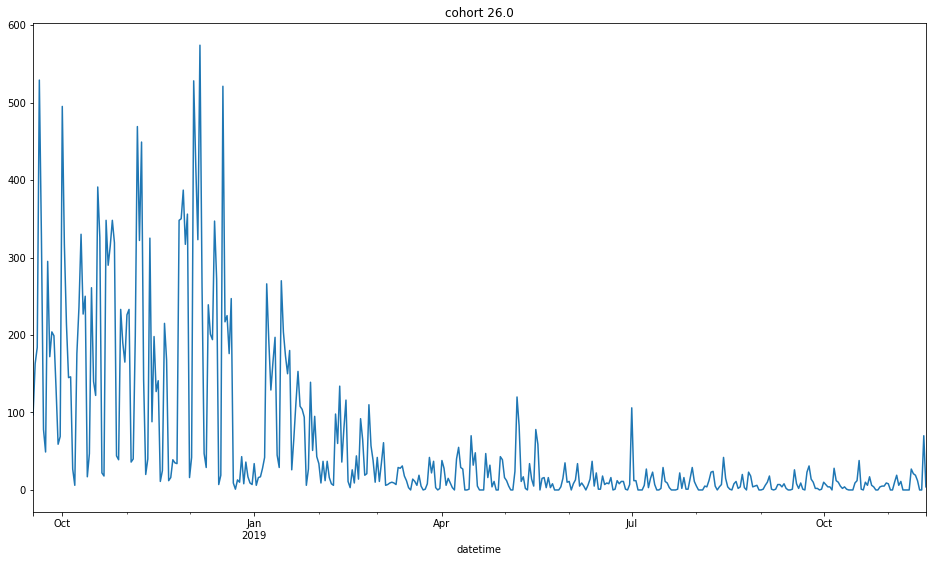

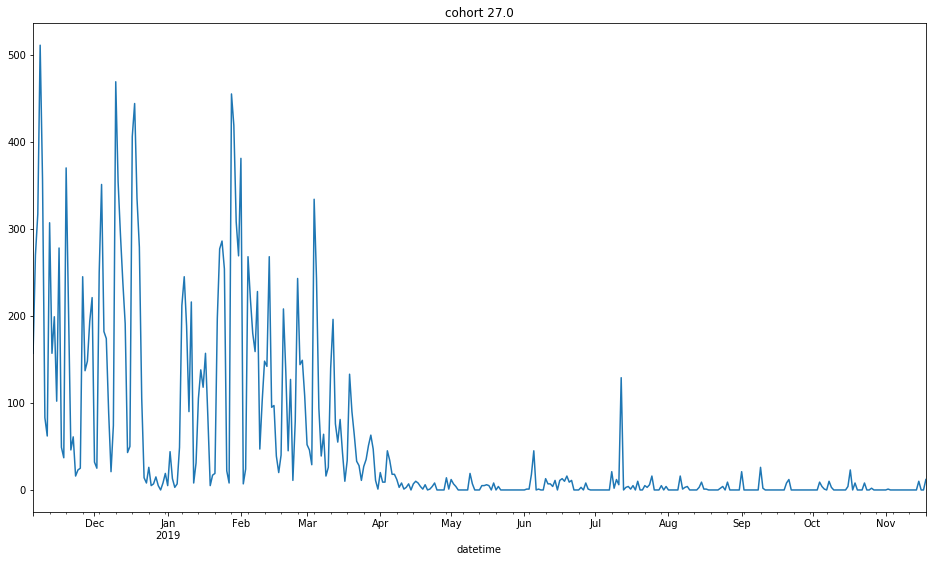

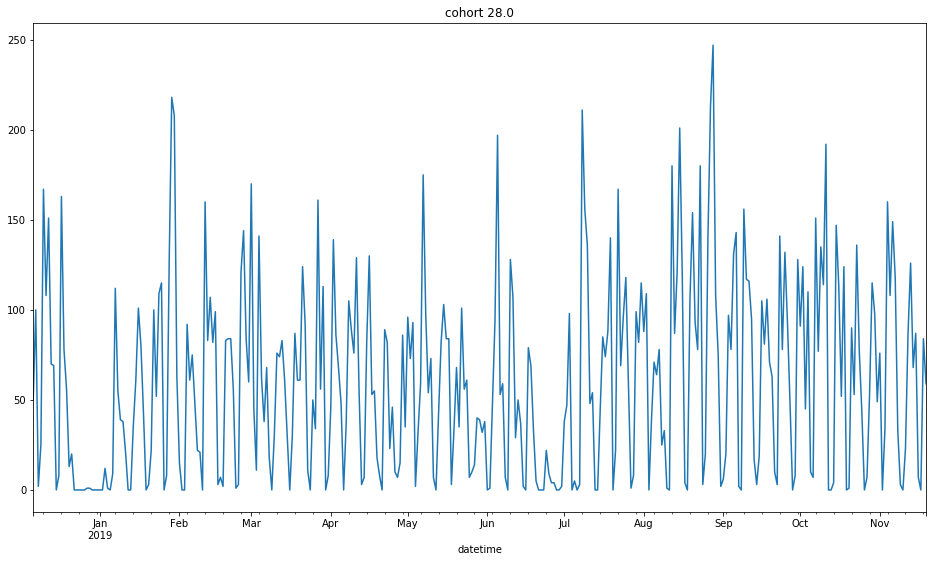

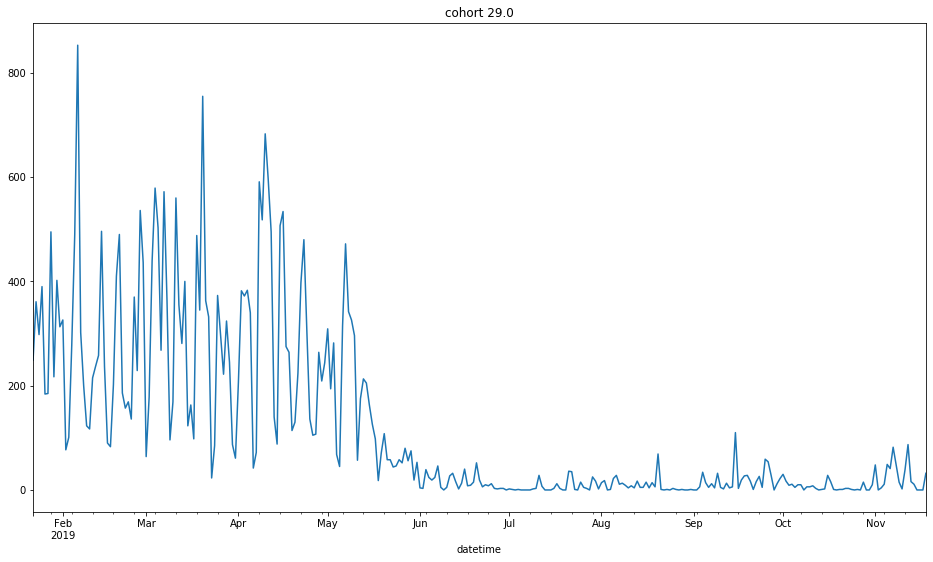

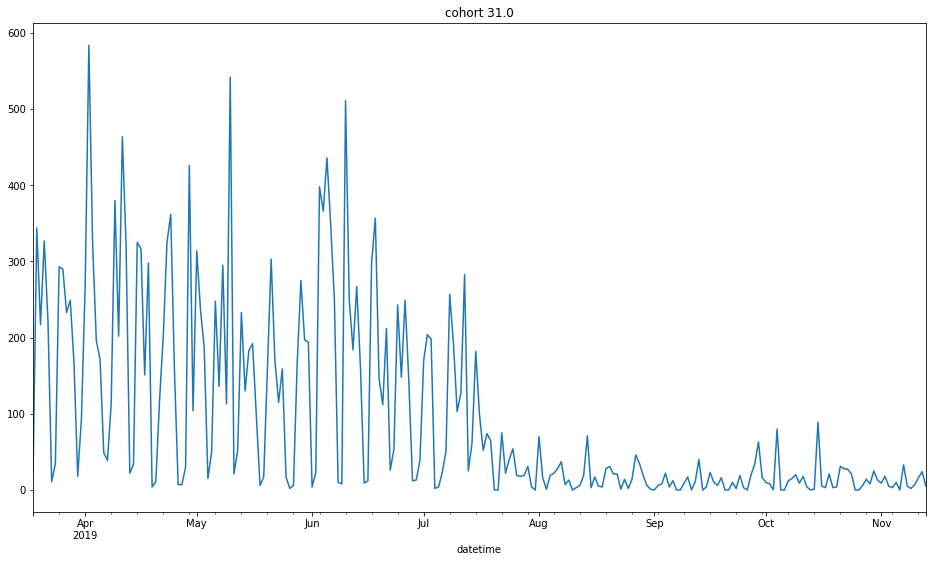

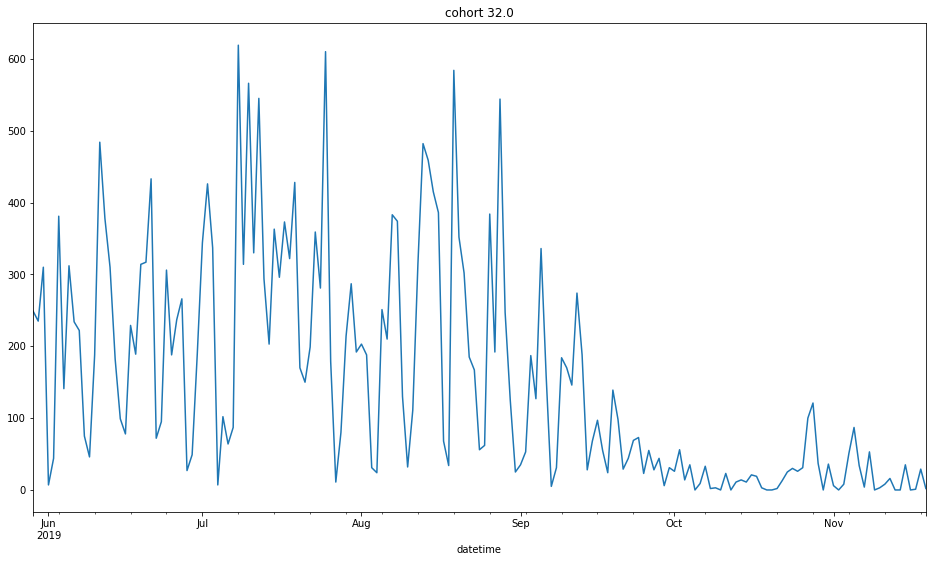

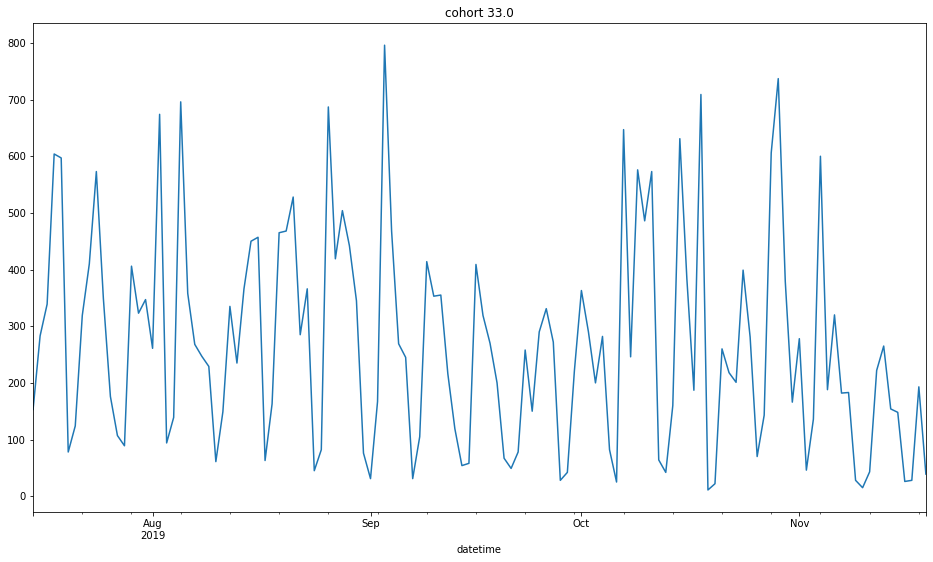

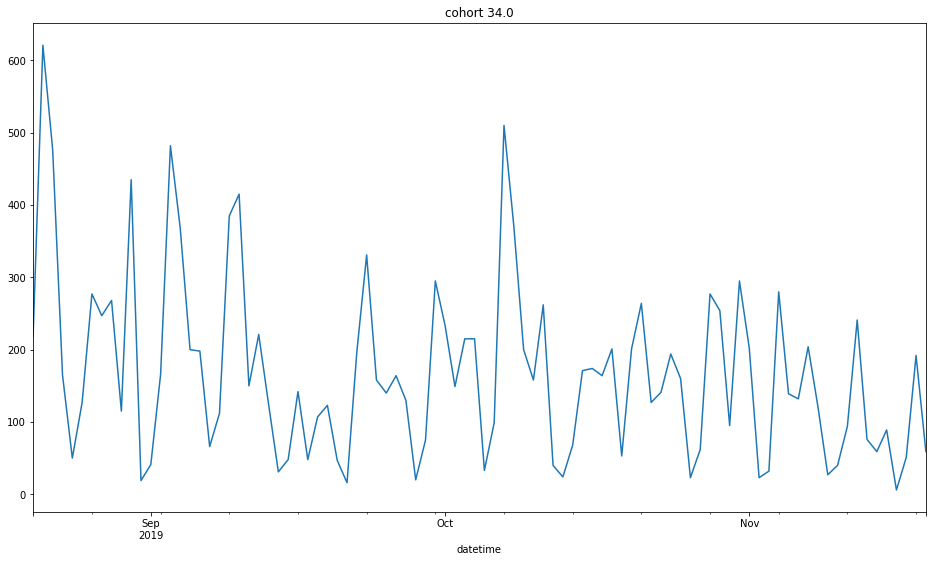

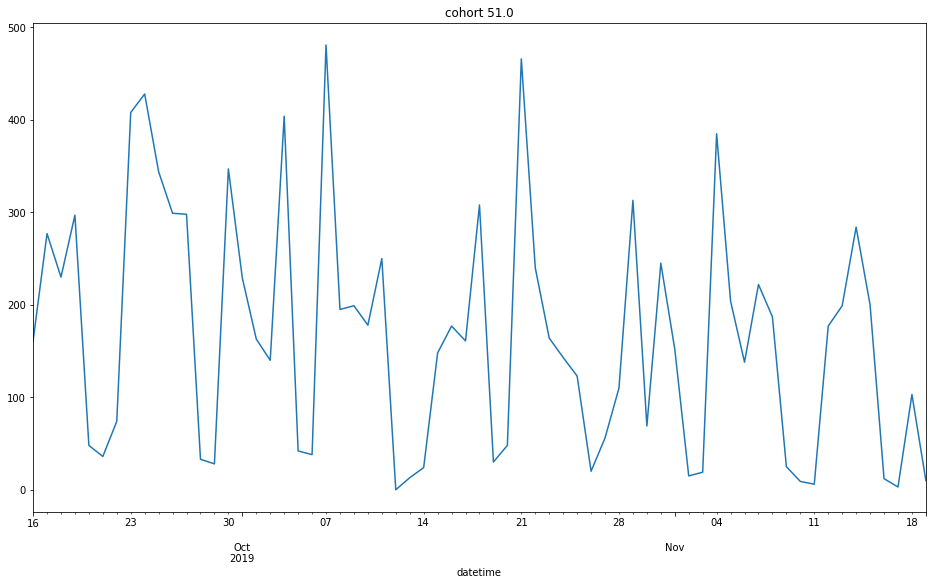

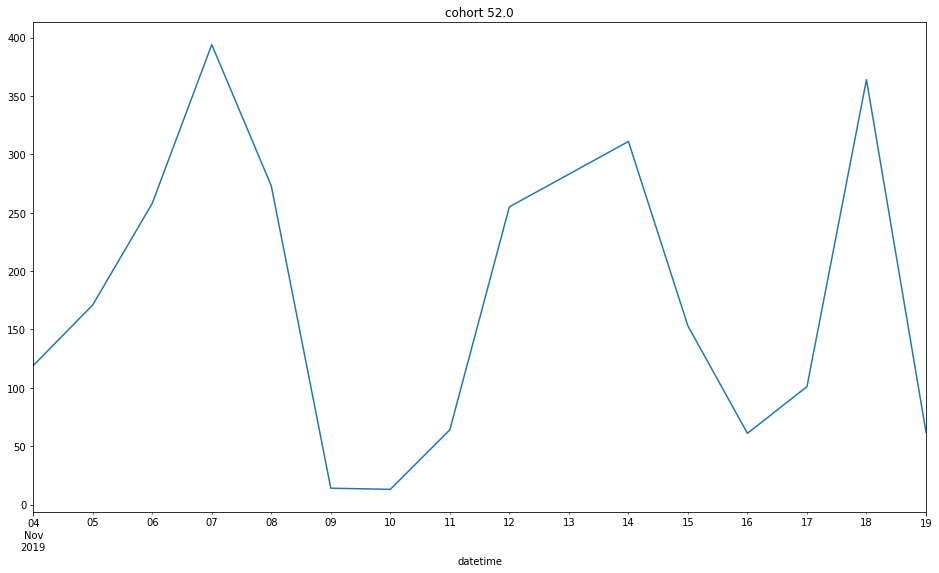

In [35]:
for i in df.groupby('y').x.unique().index :
    df[df.y == i].resample('D').count().page.plot(figsize = (16,9))
    plt.title('cohort {}'.format(i))
    plt.show()

In [ ]:
df[df.y == 1].resample('D').count().page.idxmax()

In [ ]:
df[(df.y==1) & (df.index > '2018-12-19')].x.value_counts()

In [ ]:
df[(df.x == 313) & (df.index > '2018-12-19')].resample('D').page.count().value_counts()

In [8]:
# Look at cohort #31:
df[df.y==31]['page'].resample('D').count()


datetime
2019-03-18     23
2019-03-19    344
2019-03-20    217
2019-03-21    327
2019-03-22    223
2019-03-23     11
2019-03-24     35
2019-03-25    293
2019-03-26    290
2019-03-27    233
2019-03-28    249
2019-03-29    167
2019-03-30     18
2019-03-31     94
2019-04-01    267
2019-04-02    584
2019-04-03    324
2019-04-04    196
2019-04-05    172
2019-04-06     49
2019-04-07     39
2019-04-08    113
2019-04-09    380
2019-04-10    202
2019-04-11    464
2019-04-12    321
2019-04-13     22
2019-04-14     34
2019-04-15    325
2019-04-16    317
             ... 
2019-10-15     89
2019-10-16      5
2019-10-17      3
2019-10-18     21
2019-10-19      3
2019-10-20      4
2019-10-21     31
2019-10-22     28
2019-10-23     27
2019-10-24     21
2019-10-25      0
2019-10-26      0
2019-10-27      6
2019-10-28     14
2019-10-29      8
2019-10-30     25
2019-10-31     13
2019-11-01      9
2019-11-02     18
2019-11-03      5
2019-11-04      3
2019-11-05     10
2019-11-06      0
2019-11-07     33
2

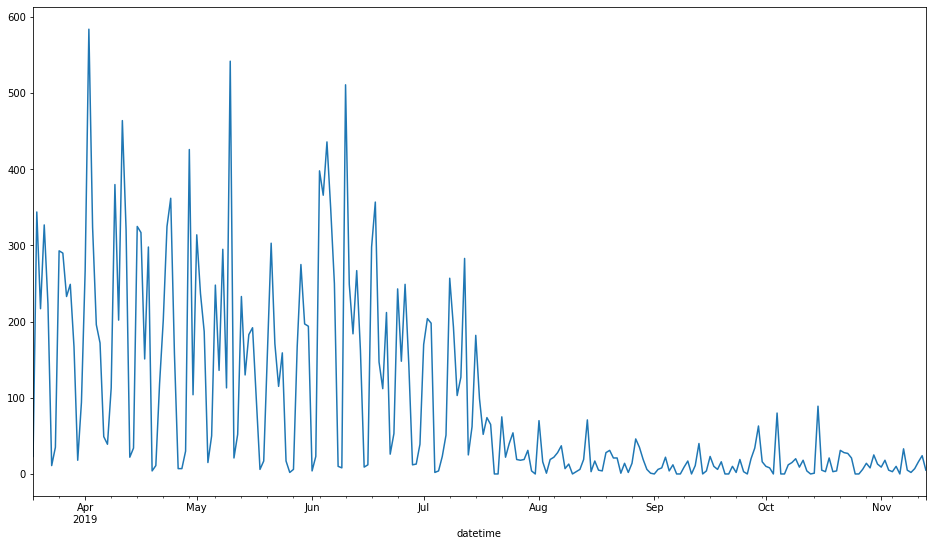

In [9]:
df[df.y==31]['page'].resample('D').count().plot(figsize = (16,9))


In [10]:
start_date_train = df[df.y==31]['page'].resample('D').count().index[0]
start_date_train


Timestamp('2019-03-18 00:00:00', freq='D')

In [11]:
end_date_train = '2019-08-31'
start_date_test = '2019-09-01'

In [12]:
df[df.y==31]['page']

datetime
2019-03-18 16:01:40                      assets/js/pdfmake.min.js.map
2019-03-18 16:02:00                                                 /
2019-03-18 16:02:08                                               toc
2019-03-18 18:53:35                                                 /
2019-03-18 18:55:34                                               toc
2019-03-18 18:58:56                                          html-css
2019-03-18 19:05:33                             html-css/introduction
2019-03-18 19:26:01                                 html-css/elements
2019-03-18 20:17:46                       appendix/git/intellij-intro
2019-03-18 21:05:07                                               toc
2019-03-18 21:05:12                                          html-css
2019-03-18 21:05:47                             html-css/introduction
2019-03-18 21:12:30                                 html-css/elements
2019-03-18 22:50:52                                               toc
2019-03-18 

In [13]:
train = df[df.y==31]['page'].resample('D').count()[:end_date_train]
train

datetime
2019-03-18     23
2019-03-19    344
2019-03-20    217
2019-03-21    327
2019-03-22    223
2019-03-23     11
2019-03-24     35
2019-03-25    293
2019-03-26    290
2019-03-27    233
2019-03-28    249
2019-03-29    167
2019-03-30     18
2019-03-31     94
2019-04-01    267
2019-04-02    584
2019-04-03    324
2019-04-04    196
2019-04-05    172
2019-04-06     49
2019-04-07     39
2019-04-08    113
2019-04-09    380
2019-04-10    202
2019-04-11    464
2019-04-12    321
2019-04-13     22
2019-04-14     34
2019-04-15    325
2019-04-16    317
             ... 
2019-08-02     16
2019-08-03      1
2019-08-04     19
2019-08-05     22
2019-08-06     28
2019-08-07     37
2019-08-08      7
2019-08-09     13
2019-08-10      0
2019-08-11      3
2019-08-12      6
2019-08-13     19
2019-08-14     71
2019-08-15      3
2019-08-16     17
2019-08-17      5
2019-08-18      4
2019-08-19     28
2019-08-20     31
2019-08-21     21
2019-08-22     21
2019-08-23      1
2019-08-24     14
2019-08-25      2
2

In [14]:
test = df[df.y==31]['page'].resample('D').count()[start_date_test:]
test

datetime
2019-09-01     0
2019-09-02     6
2019-09-03     8
2019-09-04    22
2019-09-05     4
2019-09-06    12
2019-09-07     0
2019-09-08     0
2019-09-09     9
2019-09-10    17
2019-09-11     0
2019-09-12    11
2019-09-13    40
2019-09-14     0
2019-09-15     4
2019-09-16    23
2019-09-17    10
2019-09-18     6
2019-09-19    16
2019-09-20     0
2019-09-21     0
2019-09-22    10
2019-09-23     2
2019-09-24    19
2019-09-25     3
2019-09-26     0
2019-09-27    20
2019-09-28    34
2019-09-29    63
2019-09-30    16
              ..
2019-10-15    89
2019-10-16     5
2019-10-17     3
2019-10-18    21
2019-10-19     3
2019-10-20     4
2019-10-21    31
2019-10-22    28
2019-10-23    27
2019-10-24    21
2019-10-25     0
2019-10-26     0
2019-10-27     6
2019-10-28    14
2019-10-29     8
2019-10-30    25
2019-10-31    13
2019-11-01     9
2019-11-02    18
2019-11-03     5
2019-11-04     3
2019-11-05    10
2019-11-06     0
2019-11-07    33
2019-11-08     5
2019-11-09     2
2019-11-10     7
2019-

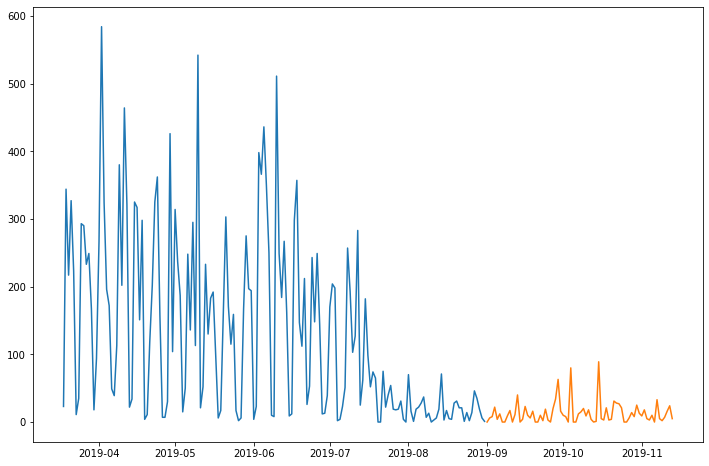

In [15]:
plt.figure(figsize = (12,8))
plt.plot(train)
plt.plot(test)
plt.show()

In [16]:
# Calculating the short-window simple movin average.
short_rolling = train.rolling(window = 7).mean()
short_rolling

datetime
2019-03-18           NaN
2019-03-19           NaN
2019-03-20           NaN
2019-03-21           NaN
2019-03-22           NaN
2019-03-23           NaN
2019-03-24    168.571429
2019-03-25    207.142857
2019-03-26    199.428571
2019-03-27    201.714286
2019-03-28    190.571429
2019-03-29    182.571429
2019-03-30    183.571429
2019-03-31    192.000000
2019-04-01    188.285714
2019-04-02    230.285714
2019-04-03    243.285714
2019-04-04    235.714286
2019-04-05    236.428571
2019-04-06    240.857143
2019-04-07    233.000000
2019-04-08    211.000000
2019-04-09    181.857143
2019-04-10    164.428571
2019-04-11    202.714286
2019-04-12    224.000000
2019-04-13    220.142857
2019-04-14    219.428571
2019-04-15    249.714286
2019-04-16    240.714286
                 ...    
2019-08-02     22.571429
2019-08-03     20.142857
2019-08-04     20.142857
2019-08-05     18.857143
2019-08-06     22.285714
2019-08-07     27.571429
2019-08-08     18.571429
2019-08-09     18.142857
2019-08-10     1

In [17]:
long_rolling = train.rolling(window = 14).mean()
long_rolling

datetime
2019-03-18           NaN
2019-03-19           NaN
2019-03-20           NaN
2019-03-21           NaN
2019-03-22           NaN
2019-03-23           NaN
2019-03-24           NaN
2019-03-25           NaN
2019-03-26           NaN
2019-03-27           NaN
2019-03-28           NaN
2019-03-29           NaN
2019-03-30           NaN
2019-03-31    180.285714
2019-04-01    197.714286
2019-04-02    214.857143
2019-04-03    222.500000
2019-04-04    213.142857
2019-04-05    209.500000
2019-04-06    212.214286
2019-04-07    212.500000
2019-04-08    199.642857
2019-04-09    206.071429
2019-04-10    203.857143
2019-04-11    219.214286
2019-04-12    230.214286
2019-04-13    230.500000
2019-04-14    226.214286
2019-04-15    230.357143
2019-04-16    211.285714
                 ...    
2019-08-02     26.285714
2019-08-03     26.357143
2019-08-04     27.714286
2019-08-05     23.928571
2019-08-06     24.357143
2019-08-07     24.142857
2019-08-08     20.785714
2019-08-09     20.357143
2019-08-10     1

Text(0, 0.5, 'Page Count')

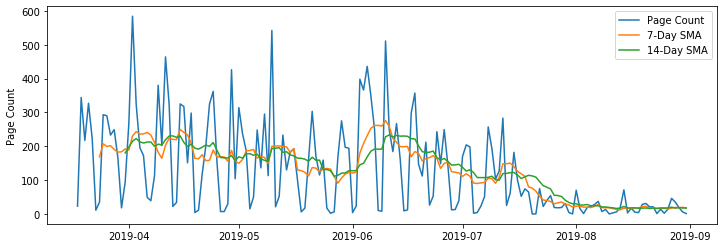

In [18]:
fig, ax = plt.subplots(figsize = (12,4))

ax.plot(train.index, train, label = 'Page Count')
ax.plot(short_rolling.index, short_rolling, label = '7-Day SMA')
ax.plot(long_rolling.index, long_rolling, label = '14-Day SMA')
ax.legend(loc = 'best')
ax.set_ylabel('Page Count')

In [19]:
ema_short = train.ewm(span = 7, adjust=False).mean()
ema_short.tail()

datetime
2019-08-27    20.868769
2019-08-28    24.401577
2019-08-29    23.051182
2019-08-30    18.788387
2019-08-31    14.341290
Freq: D, Name: page, dtype: float64

In [20]:
span = 14
ema_long = train.ewm(span=span, adjust = False).mean()
ema_long.tail()

datetime
2019-08-27    19.205229
2019-08-28    21.311198
2019-08-29    21.003039
2019-08-30    19.002633
2019-08-31    16.602282
Freq: D, Name: page, dtype: float64

In [21]:
midband = ema_long[-1]
midband

16.60228232959753

In [22]:
ub = midband + ema_long[-14:-1].std()*3
ub

22.755587498735405

In [23]:
lb = midband - ema_long[-14:-1].std()*3
lb

10.448977160459652

Text(0, 0.5, 'Page Count')

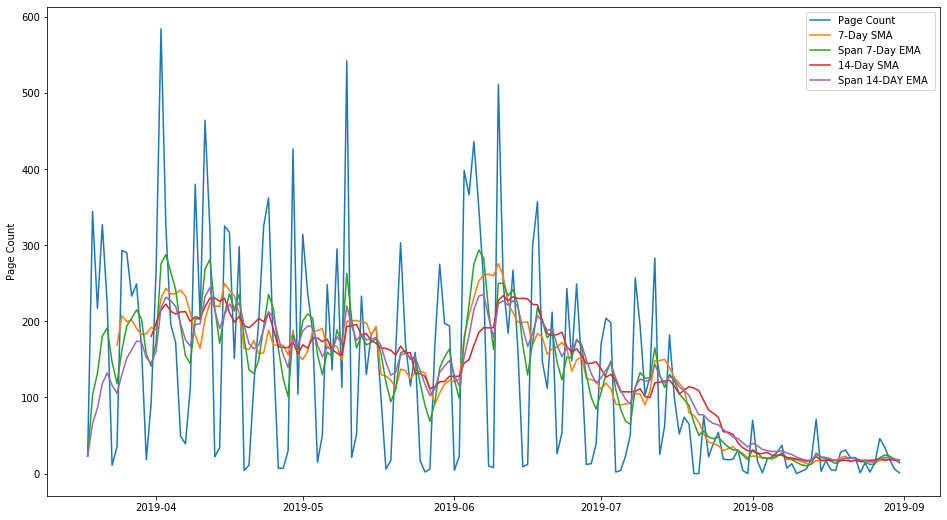

In [24]:
fig, ax = plt.subplots(figsize = (16,9))

ax.plot(train.index, train, label = 'Page Count')

ax.plot(short_rolling.index, short_rolling, label = '7-Day SMA')
ax.plot(long_rolling.index, ema_short, label = 'Span 7-Day EMA')
ax.plot(long_rolling.index, long_rolling, label = '14-Day SMA')
ax.plot(long_rolling.index, ema_long, label = 'Span 14-DAY EMA ')

ax.legend(loc='best')
ax.set_ylabel('Page Count')

In [25]:
yhat = pd.DataFrame(dict(actual = test))
yhat.head()

,actual
datetime,
2019-09-01,0
2019-09-02,6
2019-09-03,8
2019-09-04,22
2019-09-05,4


In [26]:
# Forecast using the EMA
span = 14
ema_long = train.ewm(span=span,adjust=False).mean()
midband = ema_long[-1]
ub = midband + ema_long[-14:-1].std()*3
lb = midband - ema_long[-14:-1].std()*3

yhat['moving_avg_forecast'] = midband
yhat

,actual,moving_avg_forecast
datetime,,
2019-09-01,0,16.602282
2019-09-02,6,16.602282
2019-09-03,8,16.602282
2019-09-04,22,16.602282
2019-09-05,4,16.602282
2019-09-06,12,16.602282
2019-09-07,0,16.602282
2019-09-08,0,16.602282
2019-09-09,9,16.602282


In [27]:
# Compute the absolute error:
yhat['error'] = abs(yhat.actual - yhat.moving_avg_forecast)
yhat.head()

,actual,moving_avg_forecast,error
datetime,,,
2019-09-01,0,16.602282,16.602282
2019-09-02,6,16.602282,10.602282
2019-09-03,8,16.602282,8.602282
2019-09-04,22,16.602282,5.397718
2019-09-05,4,16.602282,12.602282


In [28]:
# compute the mean of the absolute error:
yhat.error.mean()

12.300986953339471

In [29]:
# compute the upper band and lower band using IQR with weight of 3
yhat['pct_b'] = (yhat.actual - lb)/(ub-lb)
yhat


,actual,moving_avg_forecast,error,pct_b
datetime,,,,
2019-09-01,0,16.602282,16.602282,-0.849054
2019-09-02,6,16.602282,10.602282,-0.361511
2019-09-03,8,16.602282,8.602282,-0.198997
2019-09-04,22,16.602282,5.397718,0.938603
2019-09-05,4,16.602282,12.602282,-0.524025
2019-09-06,12,16.602282,4.602282,0.126032
2019-09-07,0,16.602282,16.602282,-0.849054
2019-09-08,0,16.602282,16.602282,-0.849054
2019-09-09,9,16.602282,7.602282,-0.117740


In [30]:
yhat[yhat.pct_b > 1]

,actual,moving_avg_forecast,error,pct_b
datetime,,,,
2019-09-13,40,16.602282,23.397718,2.401232
2019-09-16,23,16.602282,6.397718,1.019860
2019-09-28,34,16.602282,17.397718,1.913689
2019-09-29,63,16.602282,46.397718,4.270146
2019-10-04,80,16.602282,63.397718,5.651517
2019-10-15,89,16.602282,72.397718,6.382832
2019-10-21,31,16.602282,14.397718,1.669917
2019-10-22,28,16.602282,11.397718,1.426146
2019-10-23,27,16.602282,10.397718,1.344889


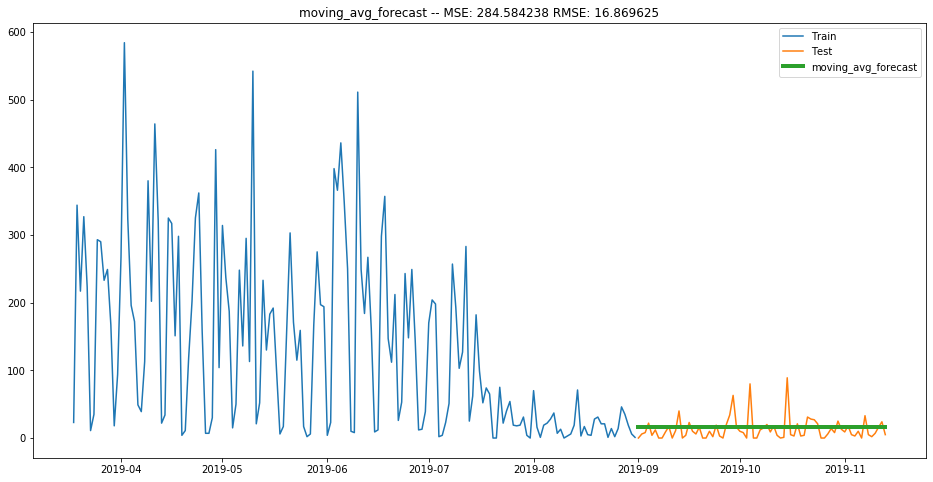

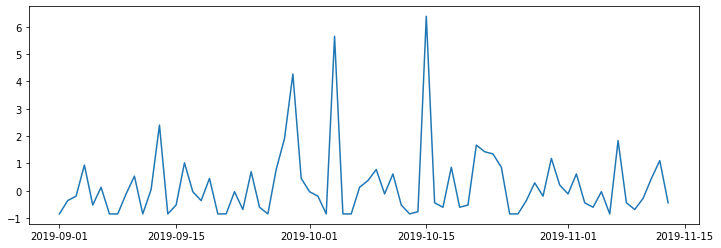

In [33]:
explore.plot_and_eval(yhat.moving_avg_forecast, actual = test, train=train, test=test)
plt.figure(figsize = (12,4))
plt.plot(yhat.pct_b)

In [59]:
df[(df.y==31) & (df.index > '2019-09-13')].x.value_counts()

464    226
395    153
390    125
375    107
383    100
393     93
430     35
385     31
373      7
379      1
Name: x, dtype: int64

In [37]:
df.head()

,page,x,y,ip_address
datetime,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [44]:
np_array = df[df.y == 31].resample('D').count().page.values.astype("float32", copy =False)
np_array[0:10]

array([ 23., 344., 217., 327., 223.,  11.,  35., 293., 290., 233.],
      dtype=float32)

In [54]:
df[df.y == 31].resample('D').page.count().describe()

count    241.000000
mean      94.045643
std      123.694053
min        0.000000
25%        8.000000
50%       24.000000
75%      167.000000
max      584.000000
Name: page, dtype: float64

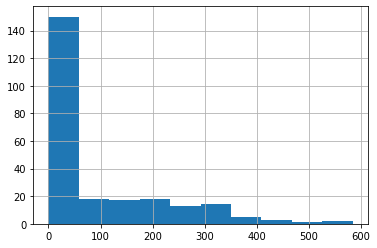

In [56]:
df[df.y == 31].resample('D').page.count().hist()